In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines



cd_path = f"./contrastive_decoding.csv"
cd_df = pd.read_csv(cd_path)

In [60]:
columns_to_keep = ["checkpoint","expert_method", "amateur_method", "dataset", "accuracy"]
cd_df = cd_df[columns_to_keep]
# for checkpoint, remove the "checkpoint-" prefix
cd_df["checkpoint"] = cd_df["checkpoint"].apply(lambda x: x.split("-")[-1])

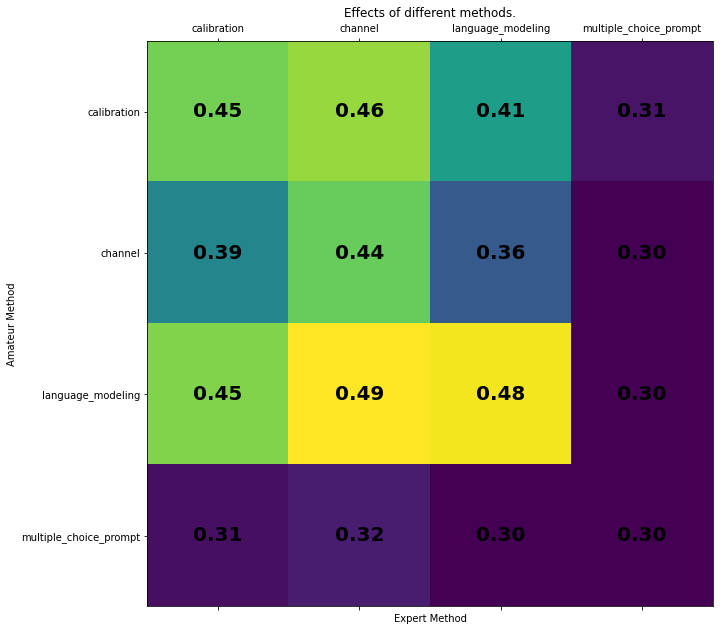

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
groups = cd_df.groupby(["expert_method", "amateur_method"])
vis_mean = groups.mean().unstack()
vis_std = groups.std().unstack()
# vis_mean.plot.bar(y="accuracy", yerr=vis_std, ax=ax, capsize=4, rot=0)
# plt.tight_layout()
# plt.savefig("cd_method.png", dpi=300)

# plot in a matrix, using matshow
ax.matshow(vis_mean["accuracy"], 
        #    cmap="viridis",   
           )
ax.set_xticks(range(len(vis_mean.index)))
ax.set_yticks(range(len(vis_mean.columns)))
ax.set_xticklabels(vis_mean.index, rotation=0)
ax.set_yticklabels(vis_mean.columns.droplevel(0))
ax.set_xlabel("Expert Method")
ax.set_ylabel("Amateur Method")
ax.set_title("Effects of different methods.")
# add the values
for i in range(len(vis_mean.index)):
    for j in range(len(vis_mean.columns)):
        ax.text(j, i, f"{vis_mean.iloc[i, j]:.2f}", 
                ha="center", 
                va="center", 
                color="black",
                fontsize=20,
                fontweight="bold",
                )
# add the legend
# legend_elements = [mpatches.Patch(color="white", label="Accuracy"),
#                      mlines.Line2D([], [], color="black", marker="o", label="Mean"),
#                         mlines.Line2D([], [], color="black", marker="|", label="Std")]
# ax.legend(handles=legend_elements, loc="lower right")
plt.tight_layout()
plt.savefig("cd_method.png", dpi=300)